# Type 1 Diabetes

What is type 1 Diabetes

Type 1 diabetes, once known as juvenile diabetes or insulin-dependent diabetes, is a chronic condition in which the pancreas produces little or no insulin. Insulin is a hormone needed to allow sugar (glucose) to enter cells to produce energy.  Treatment focuses on managing blood sugar levels with insulin, diet and lifestyle to prevent complications.   

By analysing the variable available of this are Blood Glucose level, Time of blood test, Carbs intake and Insulin dose.  The Blood Glucose level varies on different time of the day, Carbs intake and insulin dose level varies throughout the day.

During the analysis I found that the factors affecting the Blood Glucose level mainly carbs(food eaten) by the child.  The other factors affecting this if the child is sick where physical activity is less the blood glucose level goes high.

So let us use the below 8 different variables for our analysis.

* Date
* Time
* Day of the Week
* Blood Glucose Result (BG mmol recorded on blood test meter)
* Insulin Units (delivered to the child)
* Carb Ratio (grams per unit)
* Carb Intake (food eaten in grams)
* BG Level 

The Data that we will create with an algorithm, is based on the real life scenario of Type 1 Diabetes.

For this project I have taken the Type 1 Diabetes log for 20 days from  01/10/2019 to 20/10/2019. Blood Glucose level has recorded on average 8 time a day for 20 days.  Based on this real-world phenomenon as a model to synthesise the data.

# Data Cleanup

Activities for data cleanup also considered, creating different data sets using them to make one data frame.  The values has been used for analysis.  The data indexed for easy retrivel.  Duplication of records removed.

# Distributions


# Data Relationships

* Comparison between Carbs eaten and Blood Glucose level
* Time and Blood Glucose level
* The main variable is Blood Glucose level both Hight & Lows.  This is varies for variable reasons time of the day, the person growth (day by day), food eaten 2 hours before the blood test.  The Blood Glucose tested on morning as fast on week days and weekends varies on time.  If the kid is very small its hard to control whats to eat and whats not to eat.  

* The blood glucose level goes high for the following reasons.

1) The Insulin didnt delivered properly to the body
2) The Insulin dose is low for the carbs eaten
3) Carb count is not correct
4) If the Kid is sick

* The blood Glucose level goes low for the following reasons.

1) High Insulin delivered
2) Food not eaten for the carb entered
3) If the Kid is playing and active 

The week day blood glucose level stay stable compare to weekends, this is due to the fact the waking up time on weekends and eating breakfast is differs.

I devise an algorithm to generate the data set, simulating values of the 8 variables for 20 days.  I detail all this work in my notebook, and added code to generate the data set with the above properties.  


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.neighbors as nei
import sklearn.model_selection as mod
from pandas.plotting import scatter_matrix


In [61]:
df=pd.read_csv("type1diabetesproject.csv")

In [62]:
df.describe()

,BG_Result,Insulin_Delivered,Carb_Input
count,170.000000,170.000000,170.000000
mean,7.422235,2.427647,24.576471
std,6.423605,2.728092,20.475921
min,0.000000,0.000000,0.000000
25%,0.000000,0.700000,11.000000
50%,7.300000,1.500000,20.500000
75%,13.075000,2.800000,40.000000
max,23.900000,12.000000,80.000000


# Type 1 Diabetes Actual Dataset

C:\Users\babu.b\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\babu.b\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\babu.b\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\babu.b\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered 

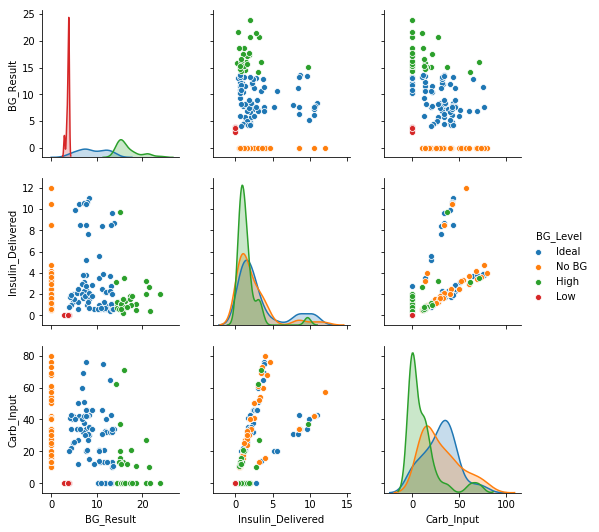

In [63]:
import seaborn as sns
sns.pairplot(df,hue="BG_Level")

In [64]:
import sklearn.neighbors as nei
inputs1=df[['BG_Result','Insulin_Delivered','Carb_Input']]
outputs1=df['BG_Level']

In [39]:
import sklearn.neighbors as nei
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs1, outputs1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [65]:
(knn.predict(inputs1)== outputs1).sum()

166

In [49]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs1,outputs1,test_size=0.33)

# Setting up variables for data frame creation.

C:\Users\babu.b\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """
C:\Users\babu.b\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  import sys


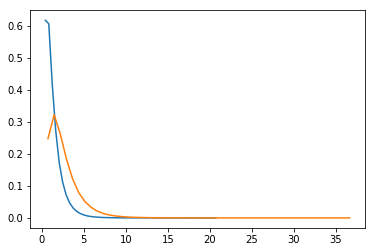

In [60]:
dfnum = 3 # between group deg of freedom
dfden = 20 # within groups degrees of freedom
nonc = 3.0
nc_vals = np.random.noncentral_f(dfnum, dfden, nonc, 1000000)
NF = np.histogram(nc_vals, bins=50, normed=True)
c_vals = np.random.f(dfnum, dfden, 1000000)
F = np.histogram(c_vals, bins=50, normed=True)
plt.plot(F[1][1:], F[0])
plt.plot(NF[1][1:], NF[0])
plt.show()

# Reference

https://carelink.minimed.eu/patient/main/proReports.do
